In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def show(img):
    if (len(img.shape) == 2):
        display(Image.fromarray(img));    
    else:
        display(Image.fromarray(img[:,:,::-1]));

In [3]:
colored = cv2.imread('Files/carkyo.jpg')
gray = cv2.cvtColor(colored, cv2.COLOR_BGR2GRAY)

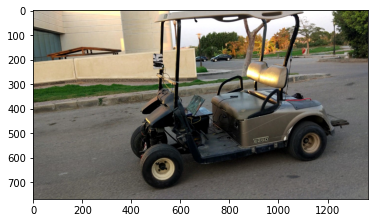

In [4]:
plt.imshow(colored[:,:,::-1]);

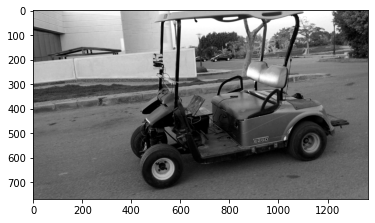

In [5]:
plt.imshow(gray, cmap='gray');

## Grayscaled:

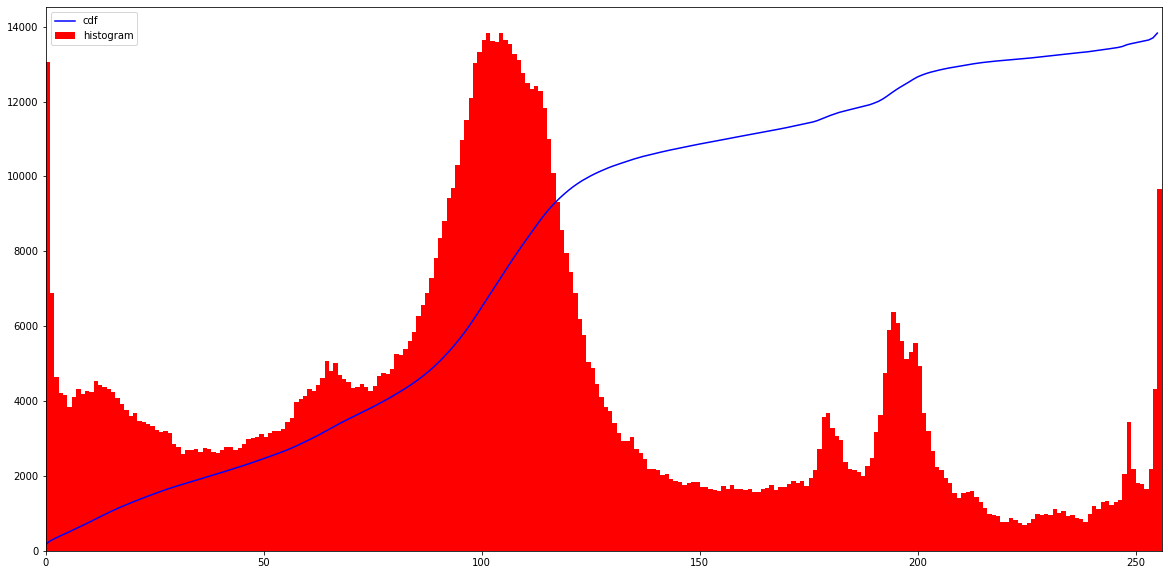

In [6]:
hist,bins = np.histogram(gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.figure(figsize=(20, 10))
plt.plot(cdf_normalized, color = 'b')
plt.hist(gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [7]:
gray_histeq = cv2.equalizeHist(gray)

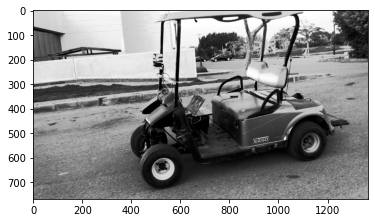

In [8]:
plt.imshow(gray_histeq, cmap='gray');

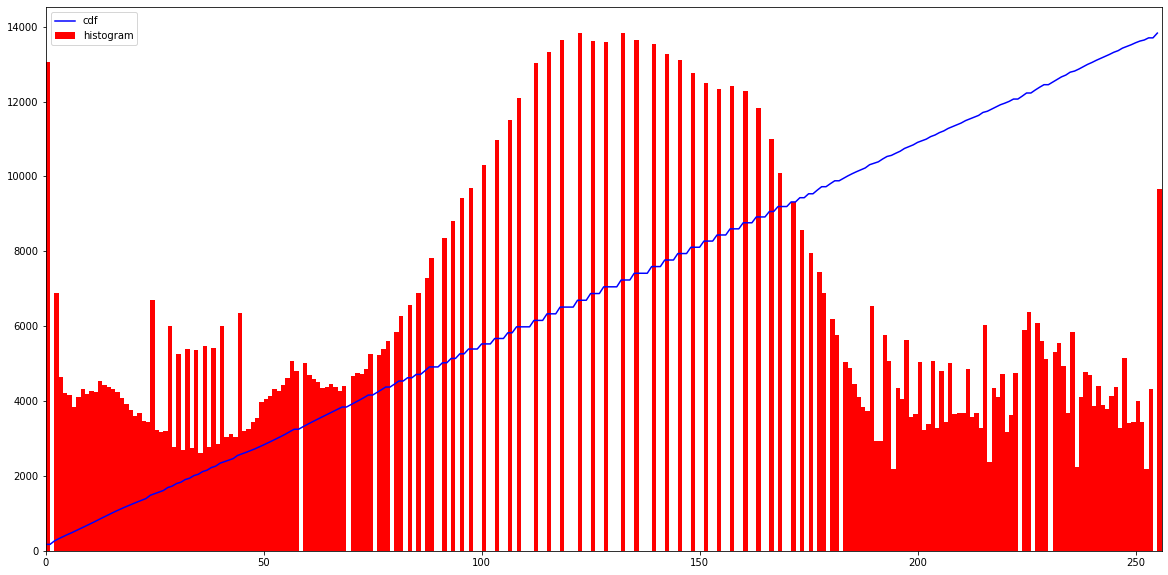

In [9]:
hist,bins = np.histogram(gray_histeq.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.figure(figsize=(20, 10))
plt.plot(cdf_normalized, color = 'b')
plt.hist(gray_histeq.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### What it 'CLAHE'?
- CLAHE is a variant of Adaptive histogram equalization which takes care of over-amplification of the contrast. CLAHE operates on small regions in the image, called tiles, rather than the entire image. The neighboring tiles are then combined using bilinear interpolation to remove the artificial boundaries.

In [10]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
gray_clahe = clahe.apply(gray)

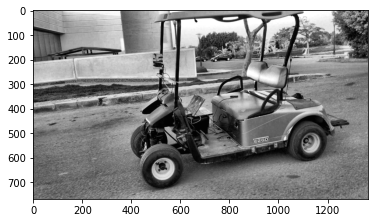

In [11]:
plt.imshow(gray_clahe, cmap='gray');

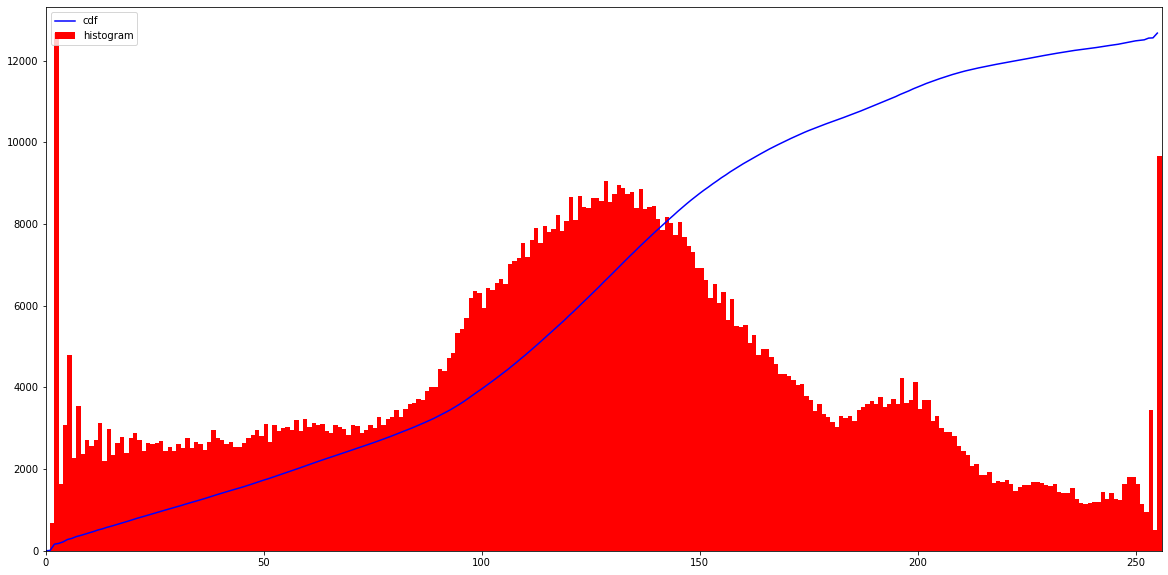

In [12]:
hist,bins = np.histogram(gray_clahe.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.figure(figsize=(20, 10))
plt.plot(cdf_normalized, color = 'b')
plt.hist(gray_clahe.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

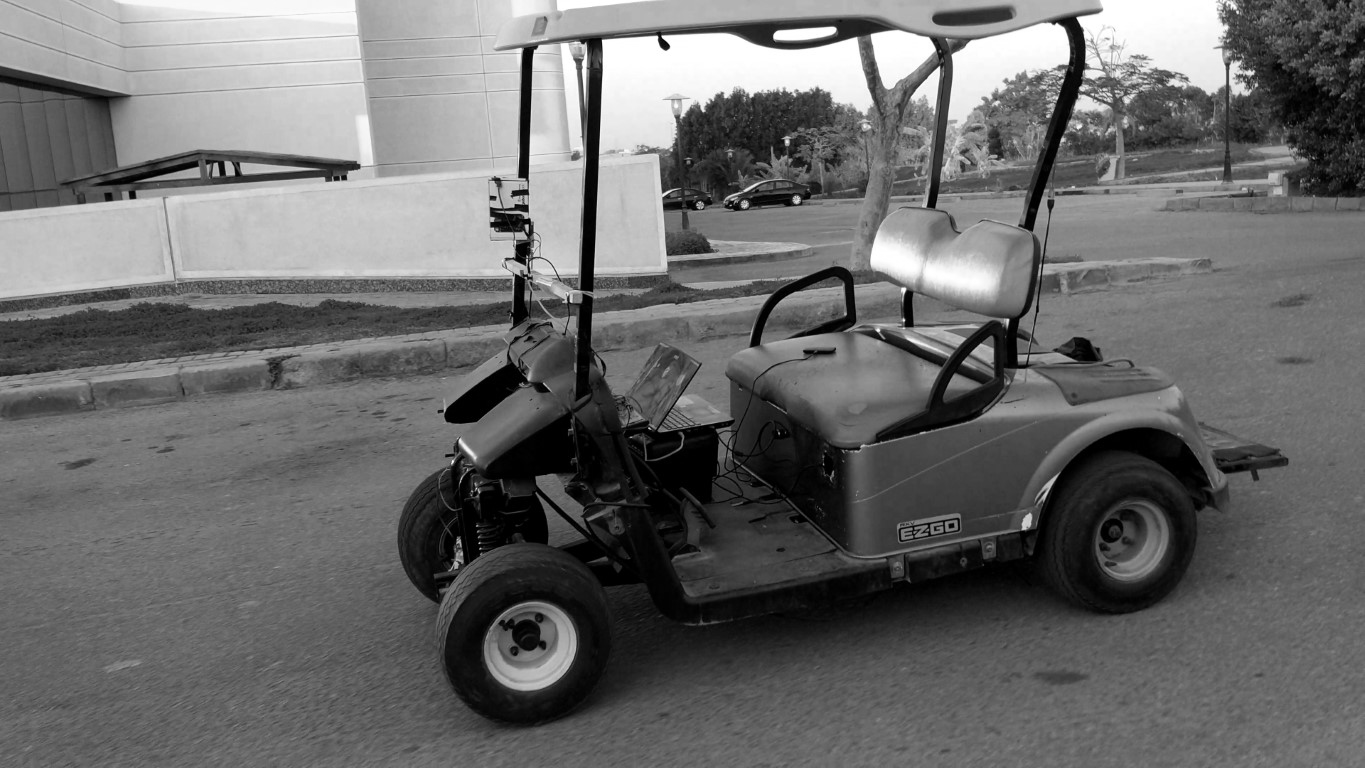

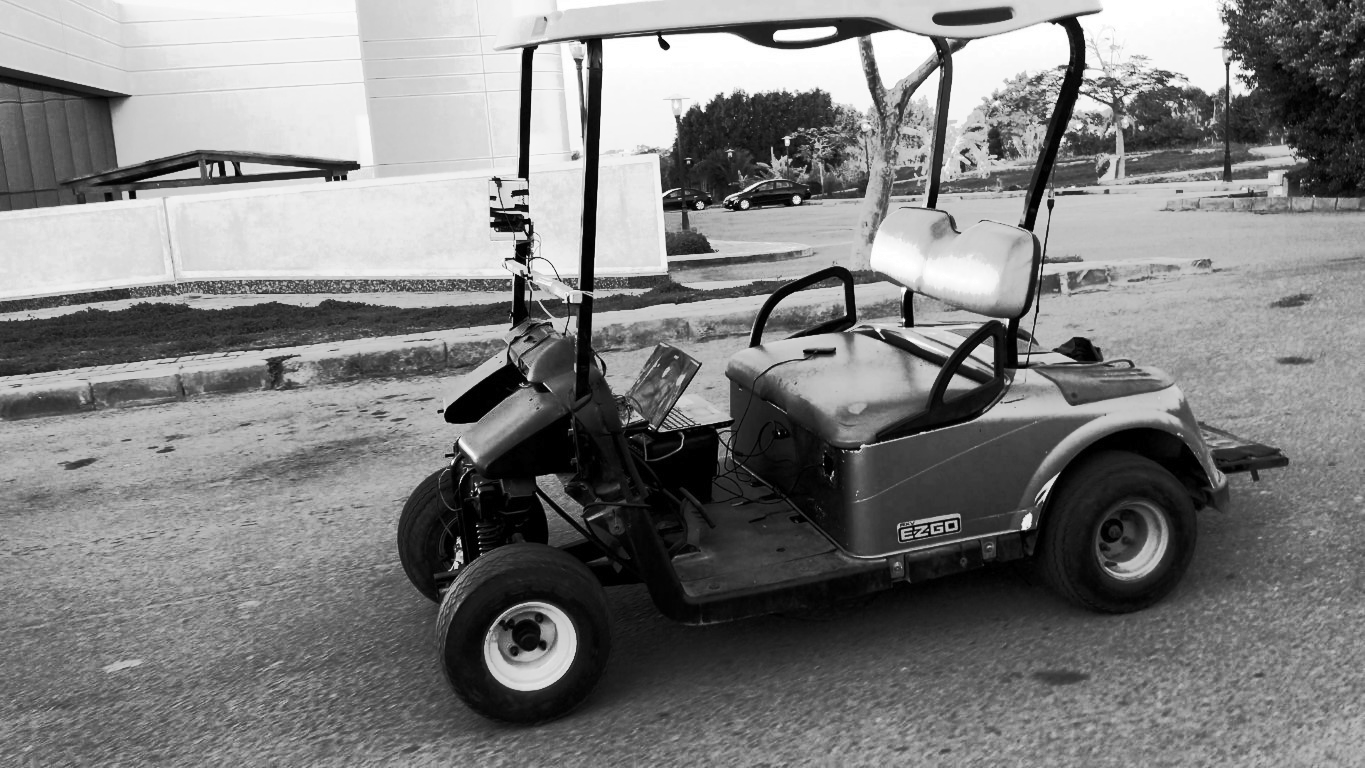

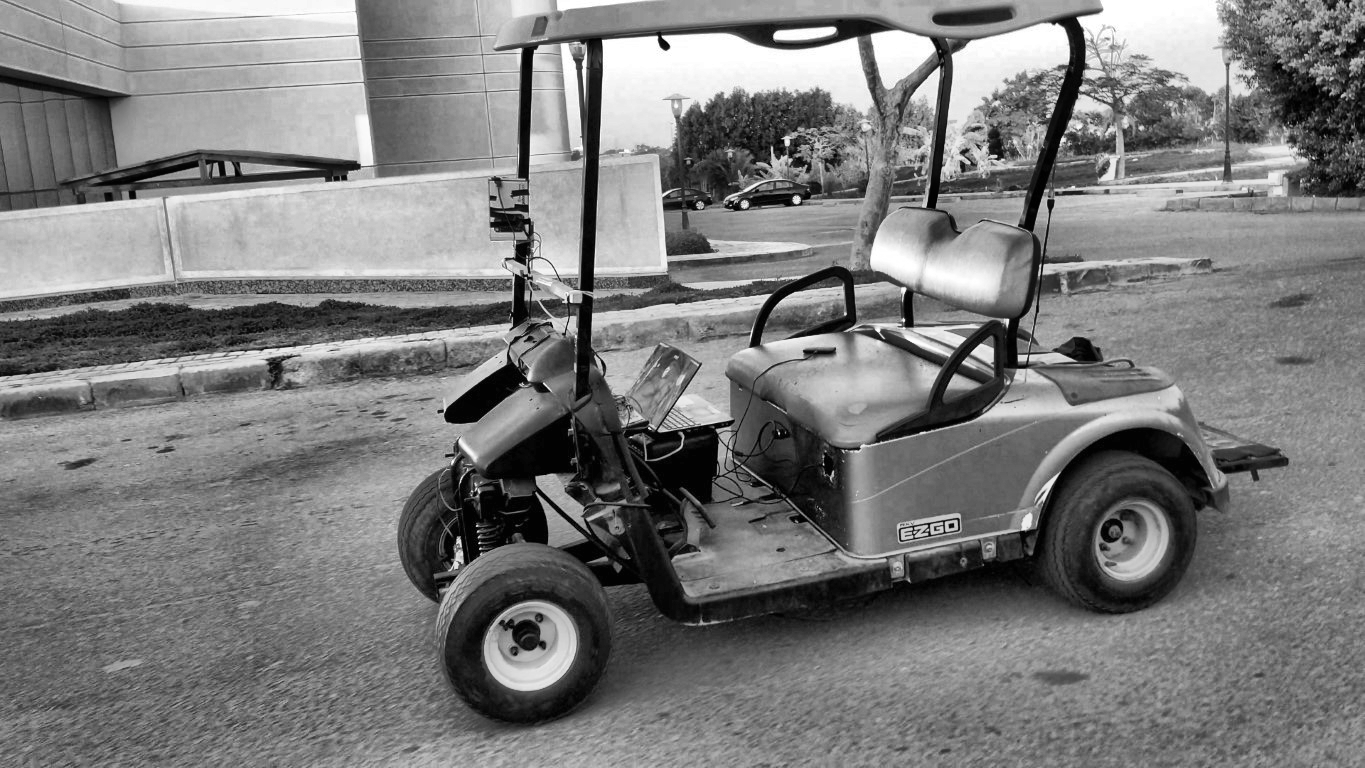

In [13]:
show(gray)
show(gray_histeq)
show(gray_clahe)

### How it is compared to what we disscused in the lecture?
- Some details in gray_histeq have been unclear (street in back)
- In contrast, in gray_clahe these details are clear very well

## Colored

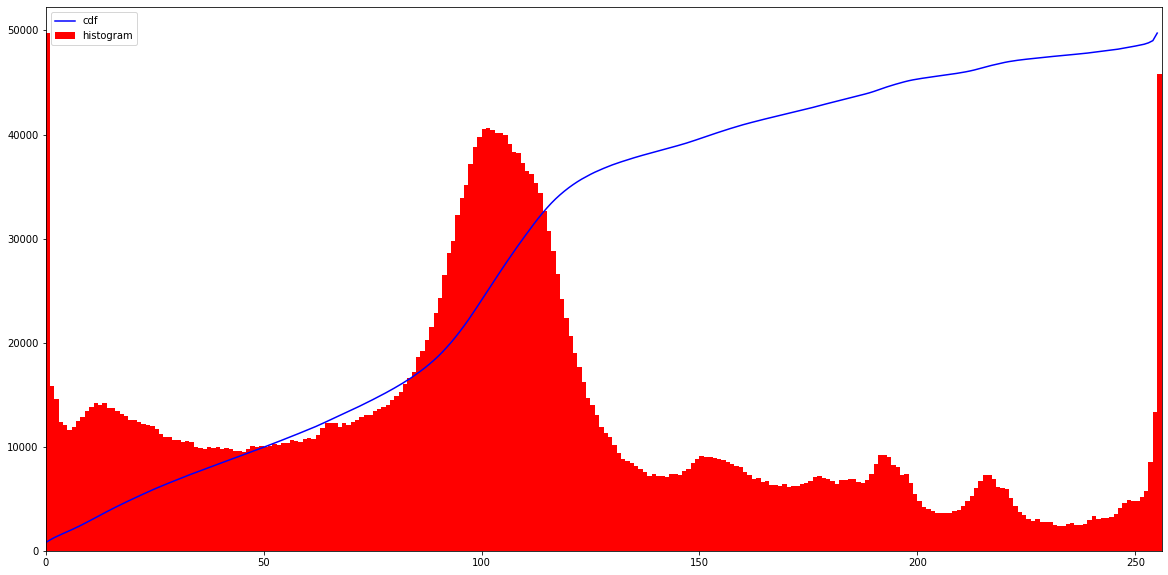

In [14]:
hist,bins = np.histogram(colored.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.figure(figsize=(20, 10))
plt.plot(cdf_normalized, color = 'b')
plt.hist(colored.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [15]:
b, g, r = cv2.split(colored)

In [16]:
beq = cv2.equalizeHist(b)
geq = cv2.equalizeHist(g)
req = cv2.equalizeHist(r)

In [17]:
colored_histeq = cv2.merge([beq, geq, req])

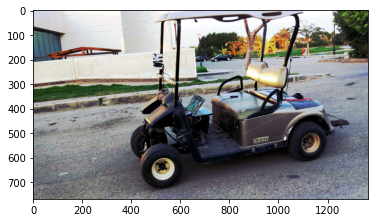

In [18]:
plt.imshow(colored_histeq[:,:,::-1]);

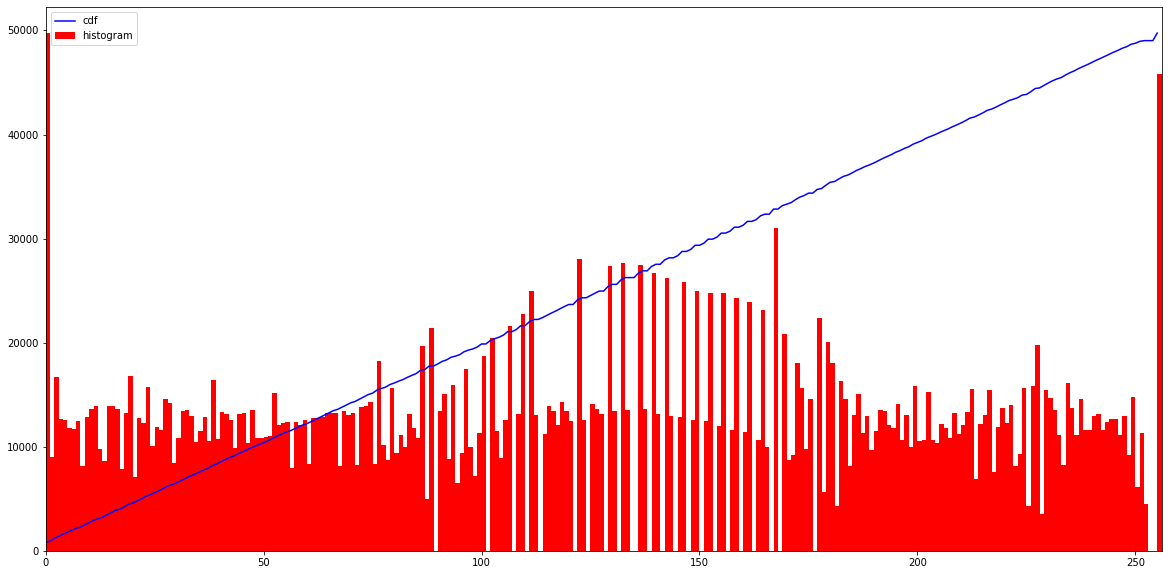

In [19]:
hist,bins = np.histogram(colored_histeq.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.figure(figsize=(20, 10))
plt.plot(cdf_normalized, color = 'b')
plt.hist(colored_histeq.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [20]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
b_clahe = clahe.apply(b)
g_clahe = clahe.apply(g)
r_clahe = clahe.apply(r)

In [21]:
colored_clahe = cv2.merge([b_clahe, g_clahe, r_clahe])

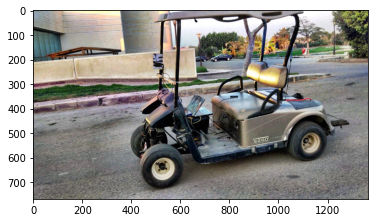

In [22]:
plt.imshow(colored_clahe[:,:,::-1]);

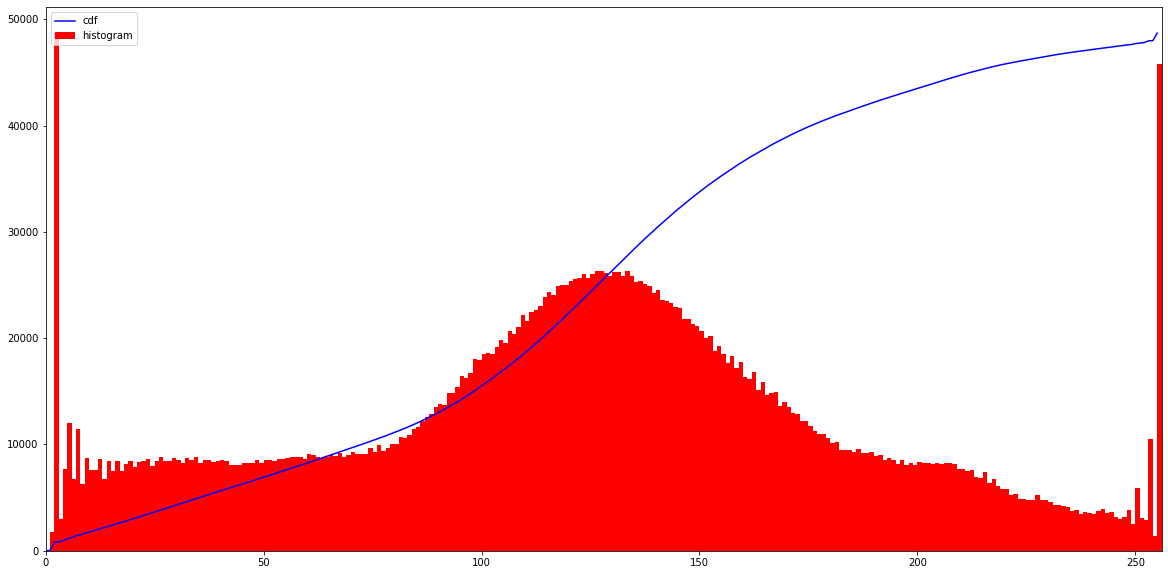

In [23]:
hist,bins = np.histogram(colored_clahe.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.figure(figsize=(20, 10))
plt.plot(cdf_normalized, color = 'b')
plt.hist(colored_clahe.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

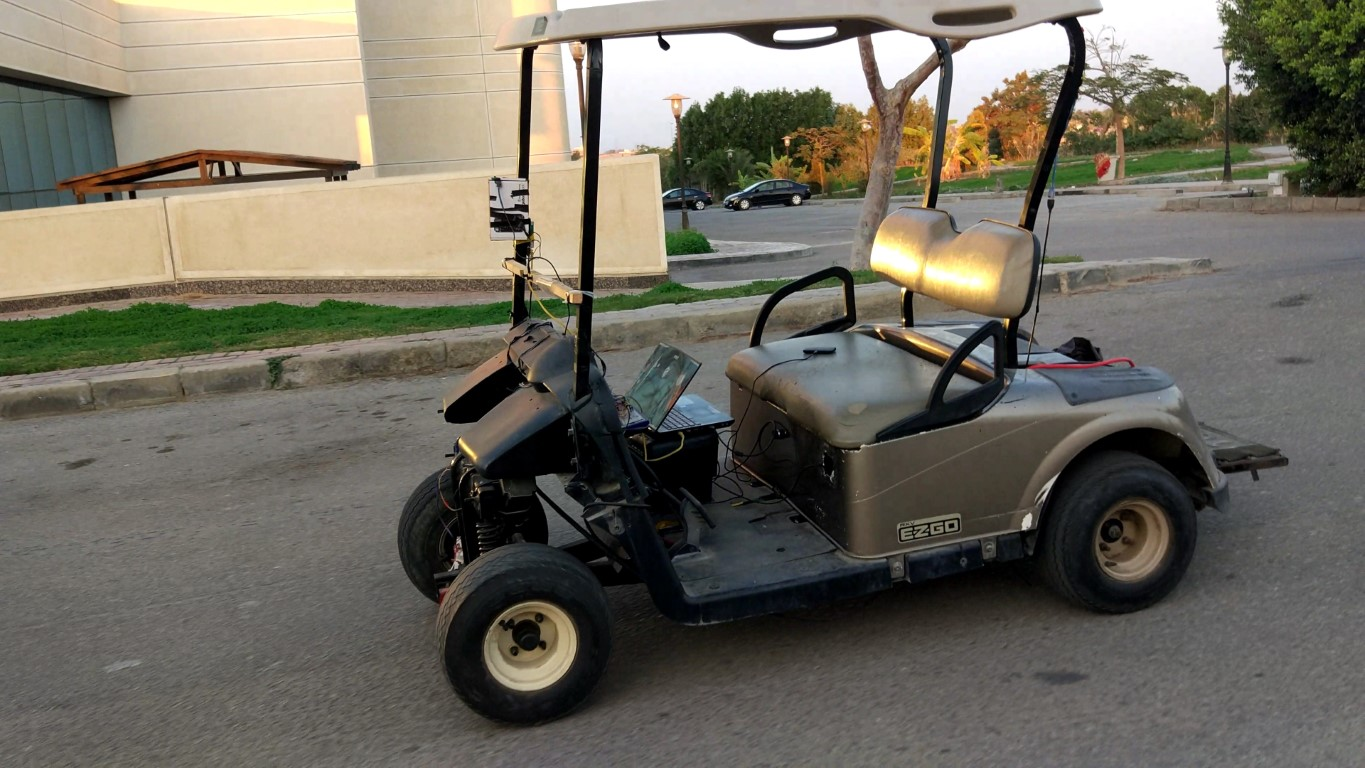

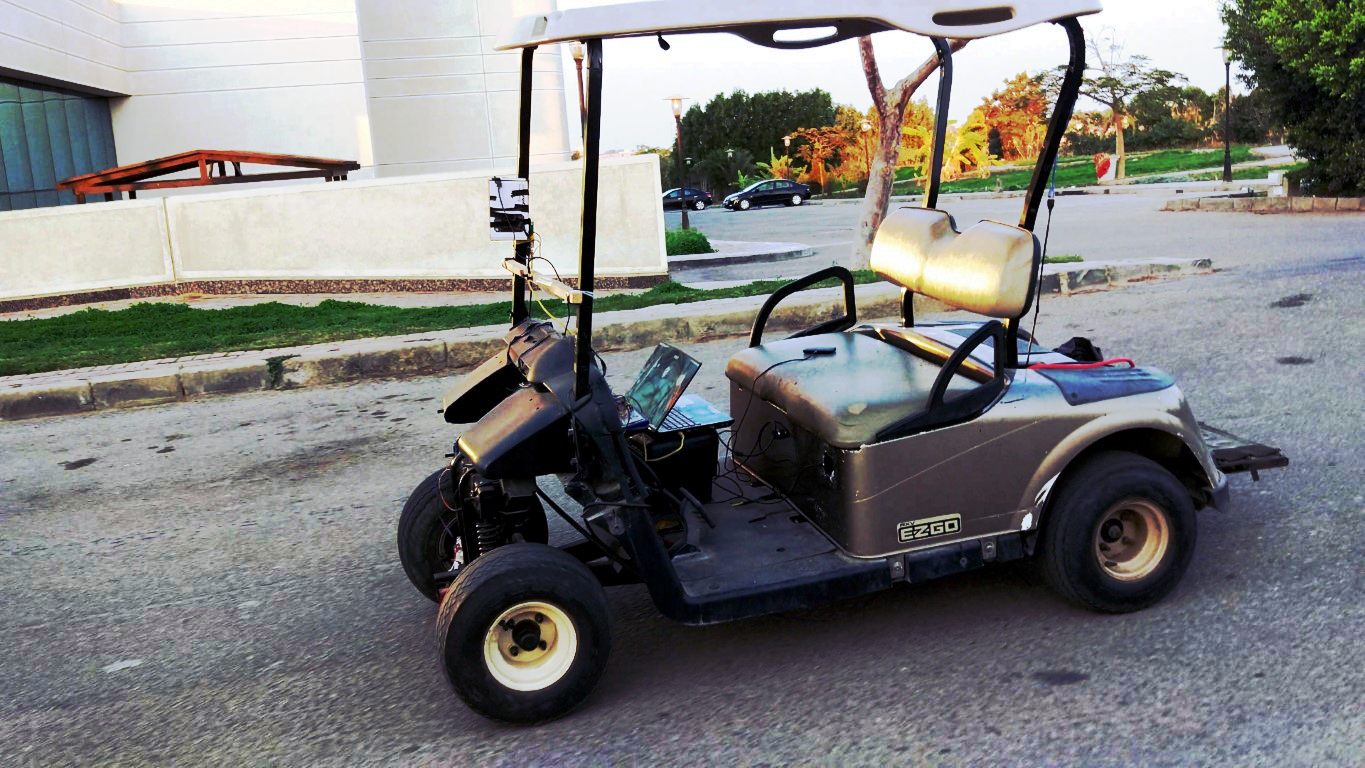

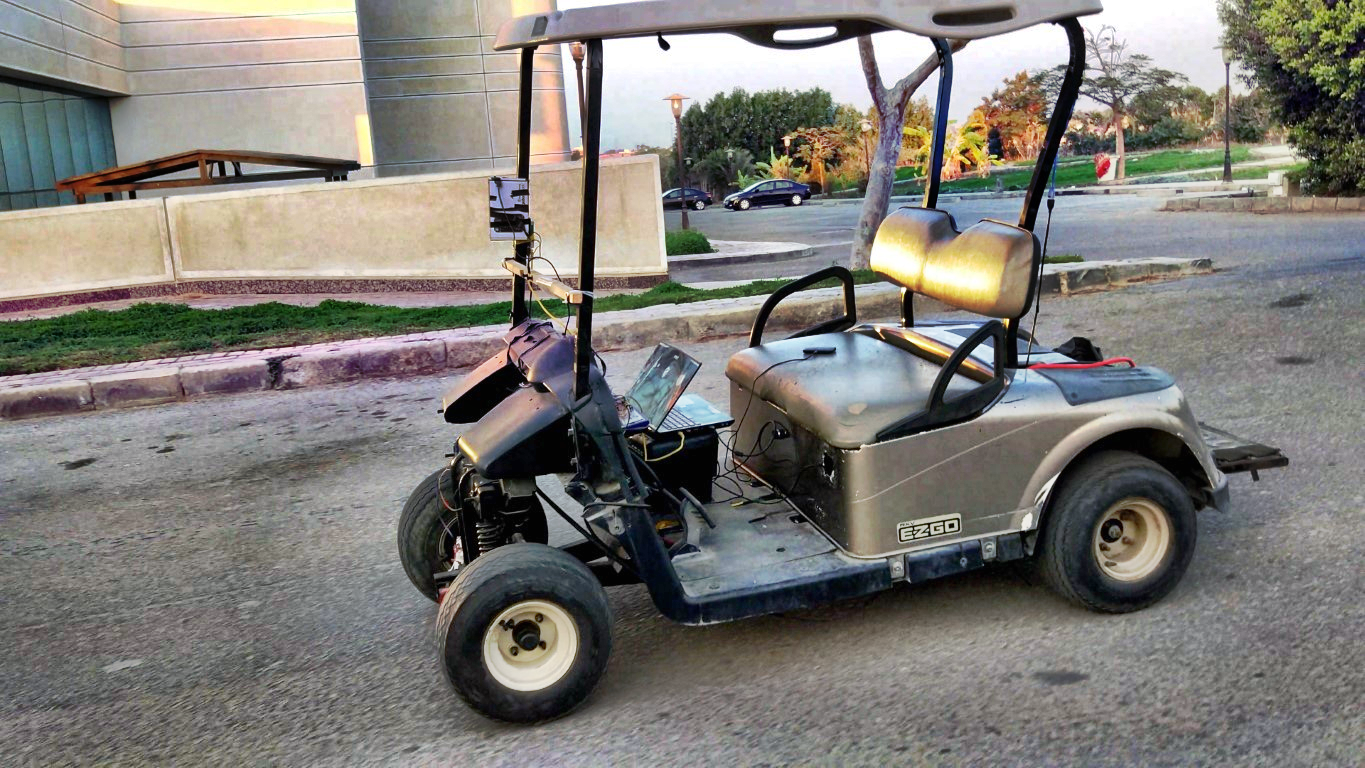

In [24]:
show(colored)
show(colored_histeq)
show(colored_clahe)

### How it is compared to what we disscused in the lecture?
- Same as gray scale image
- Some details in colored_histeq have been unclear
- In contrast, in colored_clahe these details are clear very well